### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гусейнов Вахид Азерович
##### Группа:   НБИбд-01-17

## Москва 2020
***

### Вариант № 14

Communities and Crime Data Set

Название файла: communities.data

Ссылка: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

Класс: LemasGangUnitDeploy (столбец No 125)

1.  Считайте заданный набор данных из репозитария UCI.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score as accuracy

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url, header=None, prefix='V')
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


2. Если среди меток класса имеются пропущенные значения, то удалите записи с
пропущенными метками класса. Если в признаках имеются пропущенные
значения, то замените их на средние значения признака. Если какие-либо
числовые признаки в наборе были распознаны неверно, то преобразуйте их в
числовые. Преобразуйте категориальные признаки в числовые при помощи
кодирования меток (label encoding).

In [3]:
data.replace('?', np.nan, inplace=True)
data['V124'].isna().sum()

1675

In [4]:
data['V124'].unique()

array(['0.5', nan, '0', '1'], dtype=object)

In [5]:
data = data[data['V124'].notna()]

In [6]:
cat_feats = []
num_feats = []
for col in data:
    if isinstance(data[col].iloc[0], str):
        cat_feats.append(col)
        data[col] = data[col].fillna('unknown')
        data[col] = data[col].astype('category').cat.codes
    else:
        num_feats.append(col)
        data[col] = data[col].astype(float)
        data[col] = data[col].fillna(np.nanmean(data[col]))

3. Используя метод отбора на основе важности признаков класса
ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки
(не более 10).

In [7]:
X = data.drop(columns='V124')
y = data['V124'].astype('category').cat.codes.values

clf = ExtraTreesClassifier()
clf.fit(X, y)
feat_imp = pd.DataFrame(zip(X.columns, clf.feature_importances_), columns=['feature', 'feat_imp'])
feat_imp = feat_imp.sort_values('feat_imp', ascending=False)
feat_imp

,feature,feat_imp
122,V122,0.020249
15,V15,0.018453
98,V98,0.016724
103,V103,0.016407
121,V121,0.016100
...,...,...
90,V90,0.005366
62,V62,0.005095
28,V28,0.004979
13,V13,0.004806


In [8]:
k = 2 
important_features = feat_imp['feature'].iloc[:k].tolist()

X = data[important_features]

4. Разбейте набор данных на обучающую и тестовую выборки.

In [9]:
seed = 111
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=seed)

5. Создайте и обучите классификатор на основе деревьев решений с глубиной
дерева не более 5, определите точность классификации и визуализируйте
границу принятия решений и построенное дерево решений. При визуализации
границы принятия решений используйте два признака с наиболее высокой
оценкой важности.

In [10]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(f'Точность классификации = {accuracy(y_test, preds)}')

Точность классификации = 0.5729166666666666


In [11]:
def plot_decision_boundaries(estimator, X, y, names=None, title='decision boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    colors = ['#8B0000', '#FFFF00', '#00FFFF', '#FFFFFF']
    custom_map = ListedColormap(colors)
    
    plt.figure(figsize=(10, 10))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_map)
    for label in np.unique(y_train):
        idx = np.where(y_train == label)
        plt.scatter(X_train[idx, 0], X_train[idx, 1], c=colors[label], s=20, edgecolor='k', label=label)
    plt.title(title)
    plt.legend()
    
    if names is not None:
        plt.xlabel(names[0])
        plt.ylabel(names[1])

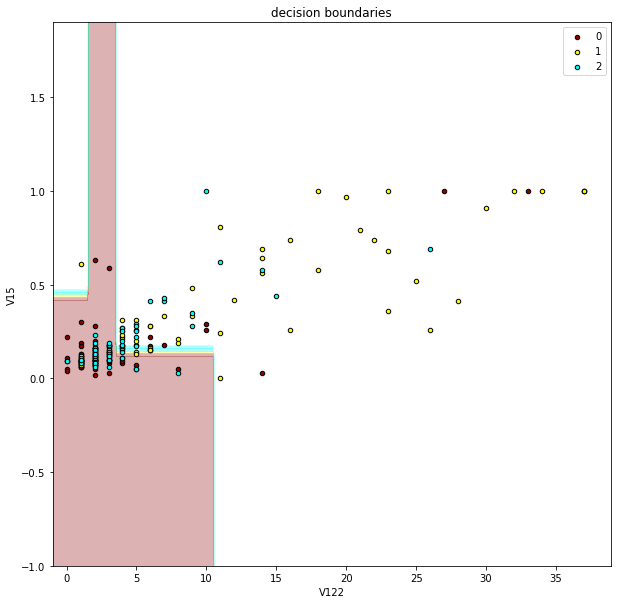

In [12]:
plot_decision_boundaries(clf, X_test, y_test, names=important_features)

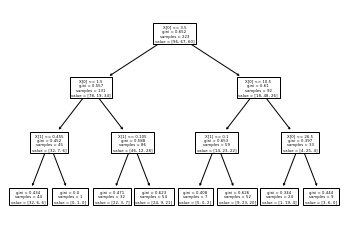

In [13]:
plot_tree(clf);

6. Постройте на основе классификатора деревьев решений ансамблевые
классификаторы:
- BaggingClassifier,
- RandomForestClassifier,
- AdaBoostClassifier,

подберите параметры ансамблевых классификаторов, чтобы добиться
большей точности классификации, и постройте границы принятия решений
ансамблевых классификаторов.

best score = 0.5234126984126984
best n_estimators = 4


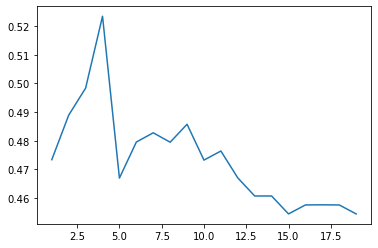

In [14]:
scores = []
n_estimators_list = [i for i in range(1, 20)]
for n_estimators in n_estimators_list:
    bag_clf = BaggingClassifier(n_estimators=n_estimators, random_state=seed)
    score = cross_val_score(bag_clf, X, y)
    scores.append(np.mean(score))
best_score = max(scores)
best_n_estimators = n_estimators_list[scores.index(best_score)]
print(f'best score = {max(scores)}\nbest n_estimators = {best_n_estimators}')
plt.plot(n_estimators_list, scores);

bag_clf = BaggingClassifier(n_estimators=best_n_estimators, random_state=seed)

best score = 0.5140376984126984
best n_estimators = 4


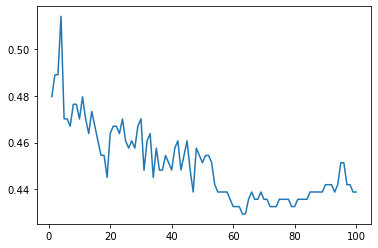

In [15]:
scores = []
n_estimators_list = [i for i in range(1, 101)]
for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=seed)
    score = cross_val_score(rf, X, y)
    scores.append(np.mean(score))
best_score = max(scores)
best_n_estimators = n_estimators_list[scores.index(best_score)]
print(f'best score = {max(scores)}\nbest n_estimators = {best_n_estimators}')
plt.plot(n_estimators_list, scores);

rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=seed)

best score = 0.5674107142857142
best n_estimators = 2
best score = 0.5705357142857143
best learning_rate = 0.31


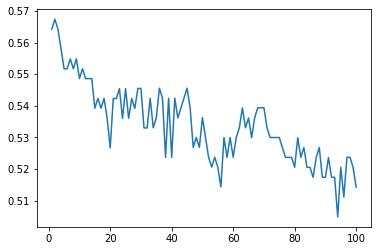

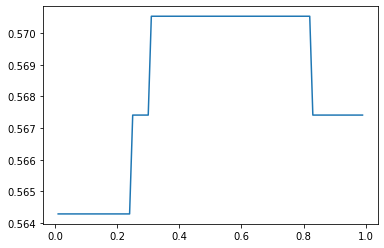

In [16]:
scores = []
n_estimators_list = [i for i in range(1, 101)]
for n_estimators in n_estimators_list:
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators, random_state=seed)
    score = cross_val_score(ada_boost, X, y)
    scores.append(np.mean(score))
best_score = max(scores)
best_n_estimators = n_estimators_list[scores.index(best_score)]
print(f'best score = {max(scores)}\nbest n_estimators = {best_n_estimators}')
plt.subplots()
plt.plot(n_estimators_list, scores);

scores = []
lrs = [0.01 * i for i in range(1, 100)]
for lr in lrs:
    ada_boost = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=lr, random_state=seed)
    score = cross_val_score(ada_boost, X, y)
    scores.append(np.mean(score))
best_score = max(scores)
best_lr = lrs[scores.index(best_score)]
print(f'best score = {max(scores)}\nbest learning_rate = {best_lr}')
plt.subplots()
plt.plot(lrs, scores);

ada_boost = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_lr, random_state=seed)

Bagging Classifier accuracy = 0.4791666666666667
RandomForest Classifier accuracy = 0.4375
AdaBoost Classifier accuracy = 0.5625


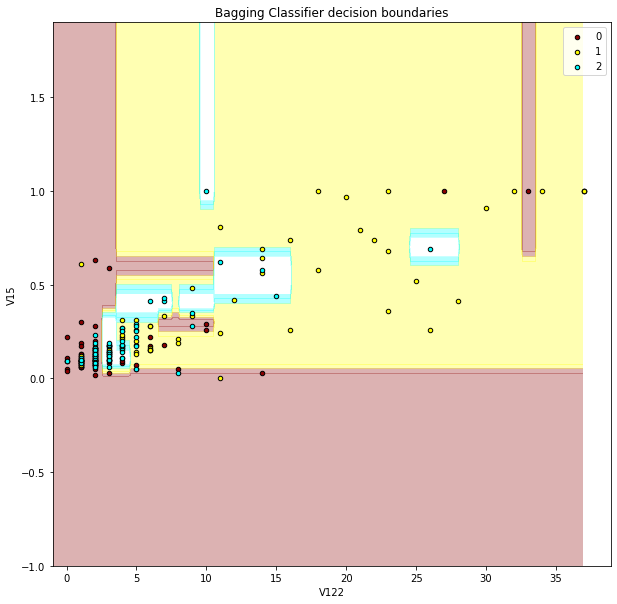

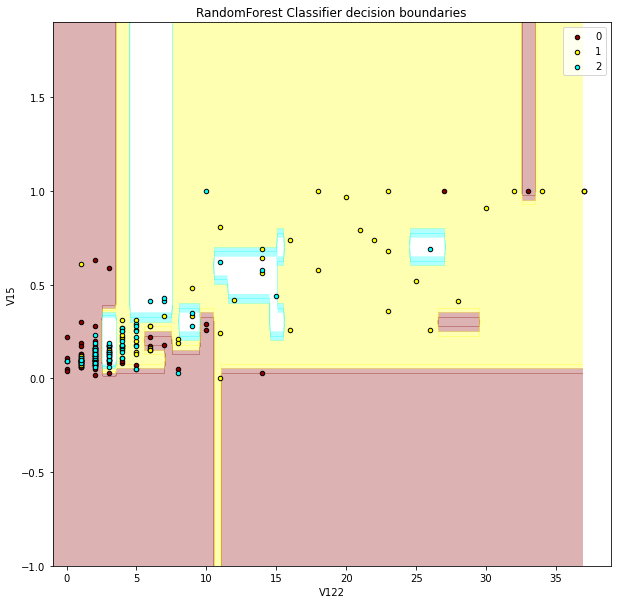

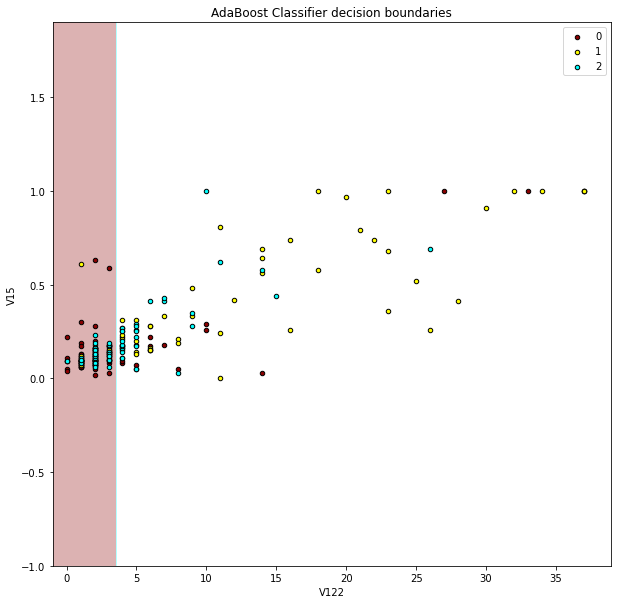

In [17]:
clfs = [bag_clf, rf, ada_boost]
names = ['Bagging Classifier decision boundaries',
         'RandomForest Classifier decision boundaries',
         'AdaBoost Classifier decision boundaries']
for clf, name in zip(clfs, names):
    clf.fit(X_train, y_train)
    score = accuracy(y_test, clf.predict(X_test))
    print(f'{" ".join(name.split()[:2])} accuracy = {score}')
    plot_decision_boundaries(clf, X_test, y_test, names=important_features, title=name)

7. Определите лучший ансамблевый классификатор, дающий наиболее высокую
точность классификации.

Лучший ансамблевый классификатор - Ada Boost